## 빅데이터 실습

### COVID19, 코로나 바이러스의 영향으로 중국인 관광객수 감소 분석

#### 중간저장 엑셀파일 로드

In [40]:
# 판다스 사용등록
import pandas as pd

In [41]:
## 데이터 로드
df_total = pd.read_excel('../day03/data/kto_total.xlsx')
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아
1,대만,35788,41,17,37,516,36399,2010-01,아시아
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아
3,마카오,554,0,0,0,0,554,2010-01,아시아
4,태국,13374,39,13,53,4335,17814,2010-01,아시아
...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙


In [42]:
condition = df_total['국적'] == '중국'

In [43]:
df_china = df_total[condition]

In [44]:
df_china.reset_index(inplace=True)  # 인덱스가 17, 77, 137등으로 진행하는 걸 0부터 순차적

In [45]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아
...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아


#### 시각화

In [46]:
# 필요 라이브러리, 모듈 사용등록
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()  # 실제 설치된 폰트 이름조회
rc('font',family=font)  # 한글 깨짐 현상 해결
rcParams['axes.unicode_minus'] = False  # 한글 사용 시 마이너스 깨짐 해결

In [48]:
# 차트 스타일 설정
sns.set_style('darkgrid')

In [49]:
# 불필요한 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

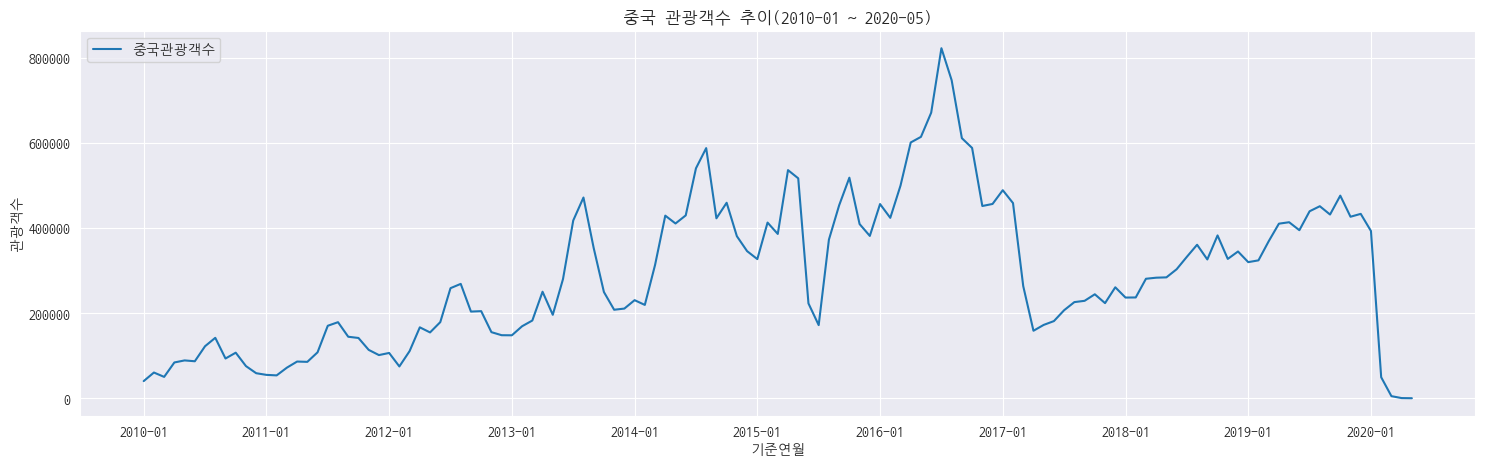

In [67]:
# 중국인 광관객수 차트 다시
plt.figure(figsize=(18, 5))
plt.plot(df_china['기준연월'], df_china['관광'], label='중국관광객수')
plt.title('중국 관광객수 추이(2010-01 ~ 2020-05)')
plt.xlabel('기준연월')
plt.ylabel('관광객수')
plt.legend(loc='upper left')
plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])

plt.show()

#### 관광객수 TOP5 나라 시각화

In [51]:
contryList = ['중국', '일본', '대만', '미국', '홍콩']

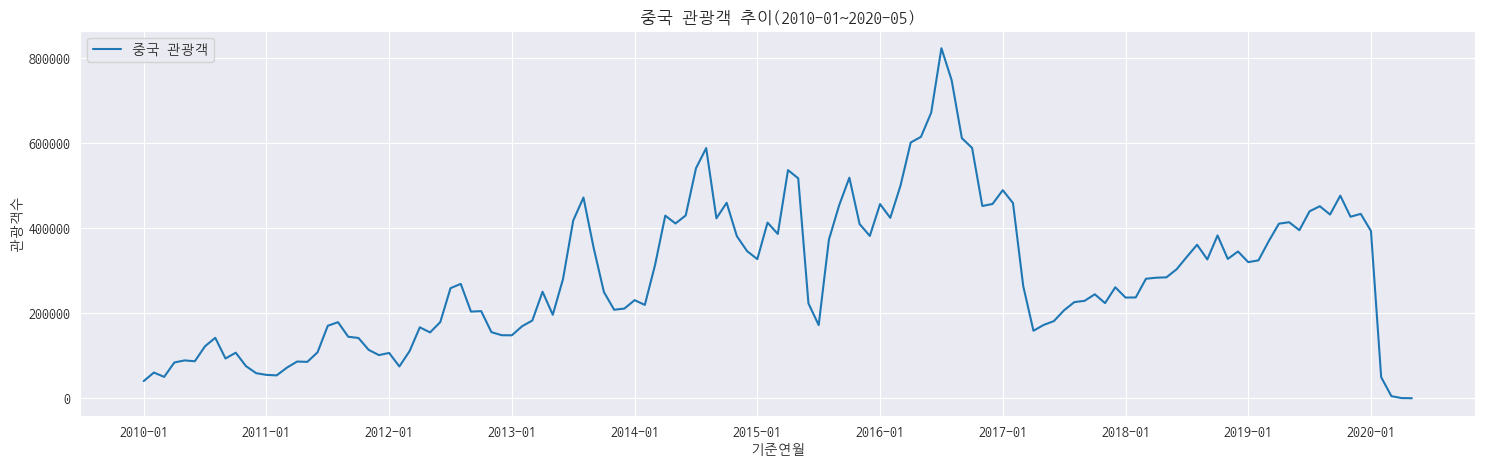

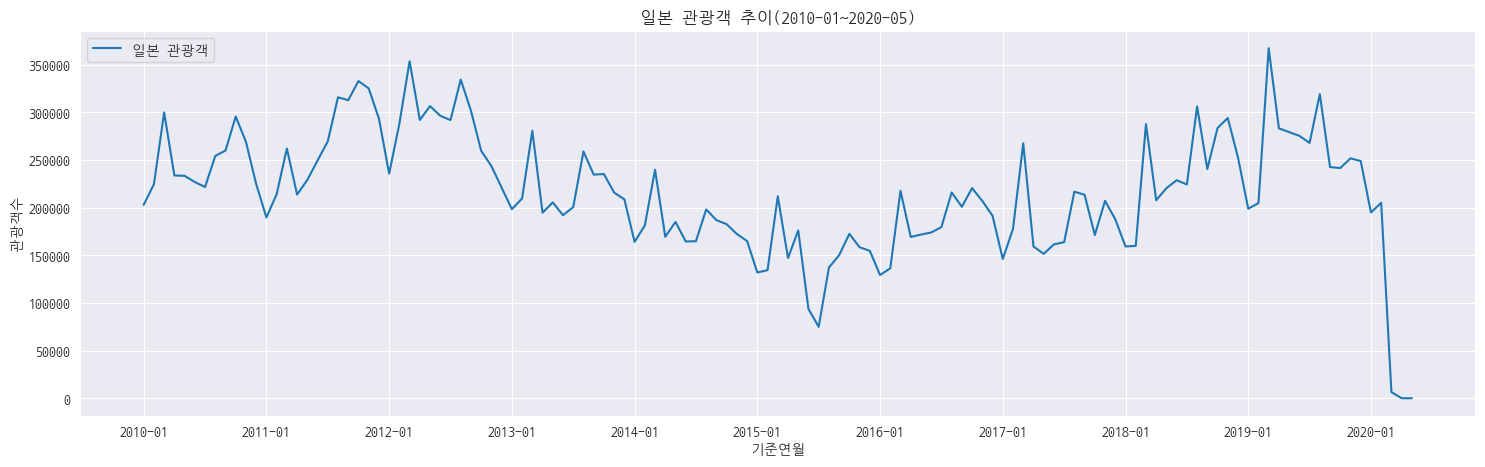

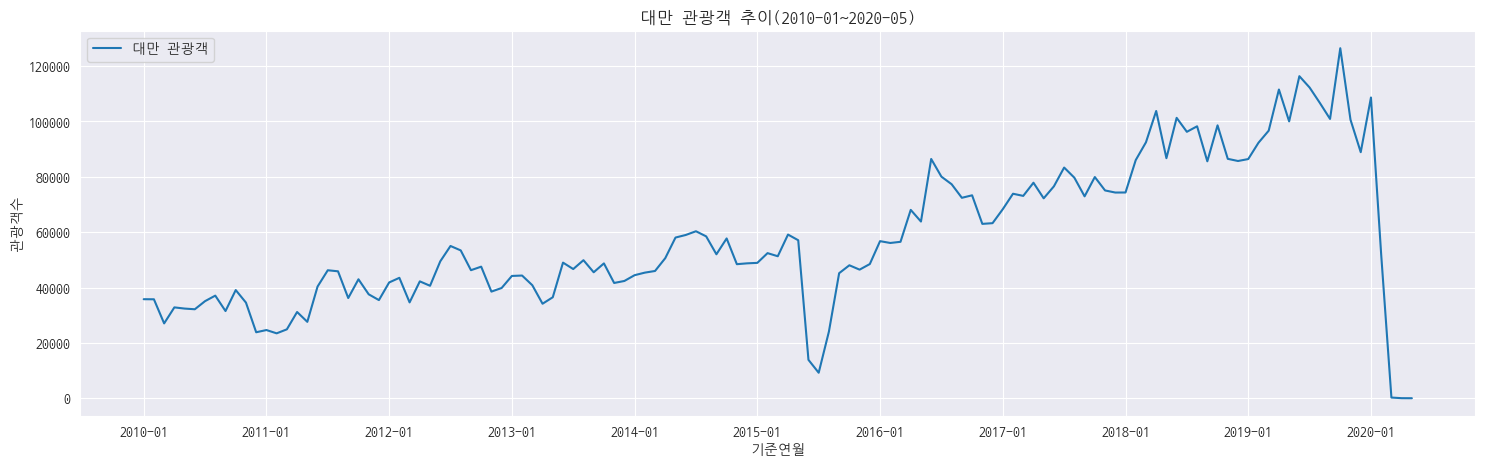

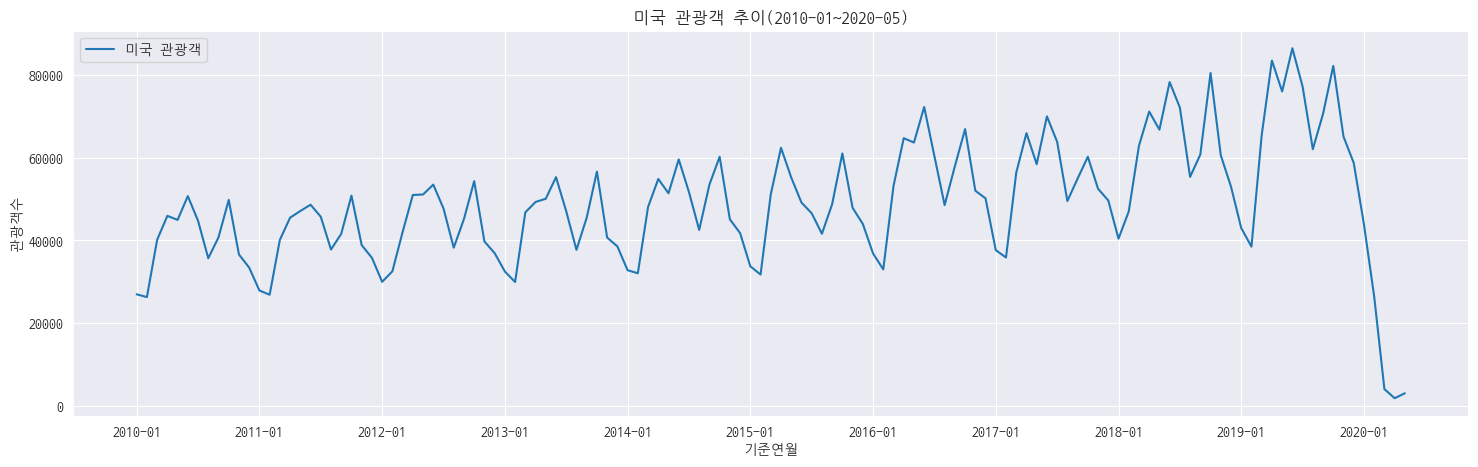

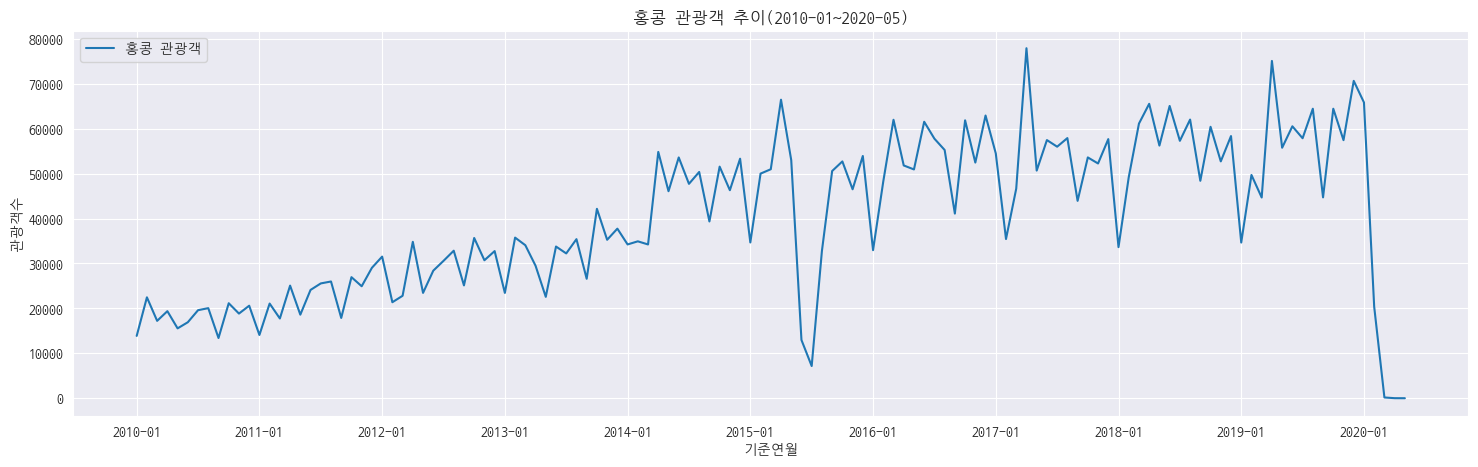

In [68]:
for contry in ['중국', '일본', '대만', '미국', '홍콩']:
    # 각 나라별로 관광객수 필터링
    condition = df_total['국적'] == contry
    df_filter = df_total[condition]
    
    plt.figure(figsize=(18, 5))
    
    plt.plot(df_filter['기준연월'], df_filter['관광'], label=f'{contry} 관광객')
    plt.title(f'{contry} 관광객 추이(2010-01~2020-05)')
    plt.xlabel('기준연월')
    plt.ylabel('관광객수')
    plt.legend(loc='upper left')
    
    plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])
    plt.show()

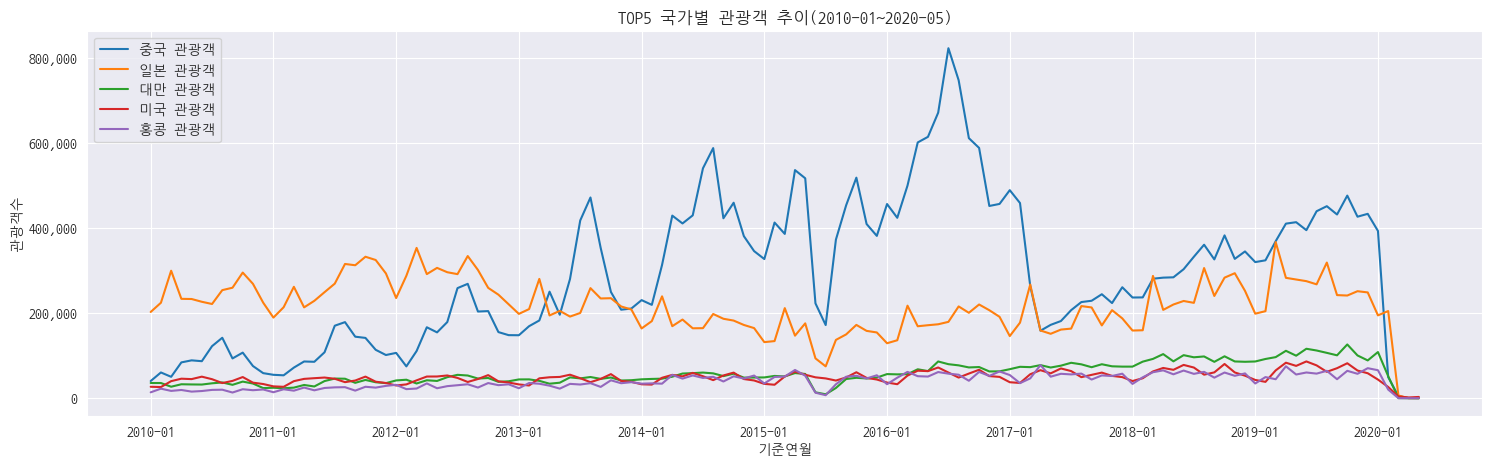

In [69]:
plt.figure(figsize=(18, 5))
for contry in ['중국', '일본', '대만', '미국', '홍콩']:
    # 각 나라별로 관광객수 필터링
    condition = df_total['국적'] == contry
    df_filter = df_total[condition]
    
    plt.plot(df_filter['기준연월'], df_filter['관광'], label=f'{contry} 관광객')
    plt.xlabel('기준연월')
    plt.ylabel('관광객수')
    plt.legend(loc='upper left')
    
    plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])

plt.title(f'TOP5 국가별 관광객 추이(2010-01~2020-05)')
## y축 라벨(1000단위 쉼표)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}' for x in current_values])
plt.show()


##### 히트맵

연도와 월을 현재 하나의 컬럼으로 구성, 히트맵으로 사용할 때는 연도와 월을 분리

In [54]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아
1,대만,35788,41,17,37,516,36399,2010-01,아시아
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아
3,마카오,554,0,0,0,0,554,2010-01,아시아
4,태국,13374,39,13,53,4335,17814,2010-01,아시아
...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙


In [55]:
## 연도, 월 분리 ' 2010-01' slice(0. 4): 2010 / slice(5, 7): 01
df_total['연도'] = df_total['기준연월'].str.slice(0, 4)
df_total['월'] = df_total['기준연월'].str.slice(5, 7)

In [56]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,연도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,2010,01
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,2020,05
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,2020,05
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2020,05
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,2020,05


In [57]:
# 기존의 df_china에는 연도, 월 컬럼이 없으므로 다시 df_total에서 필터링 새로 할당
condition = df_total['국적'] == '중국'
df_china = df_total[condition]

In [58]:
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,연도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,2010,05
...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,2020,01
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,2020,02
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,2020,03
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,2020,04


In [63]:
## 피벗테이블로 구성
df_chinaPivot = df_china.pivot_table(values='관광', index='연도', columns='월', aggfunc='sum')

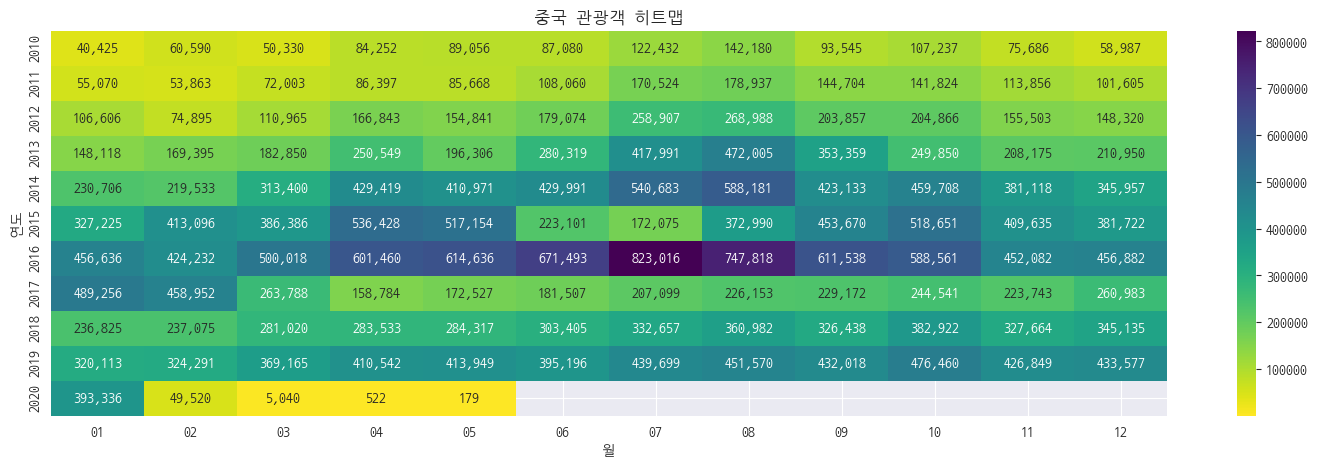

In [71]:
## 히트맵
plt.figure(figsize=(18, 5))
# fmt = '.0f' 소수점을 삭제 옵션
ax = sns.heatmap(df_chinaPivot, annot=True, fmt='.0f', cmap='viridis_r')
plt.title('중국 관광객 히트맵')

for t in ax.texts:
    t.set_text(f'{int(t.get_text()):,d}')   # 1000단위 쉼표 표시

plt.show()

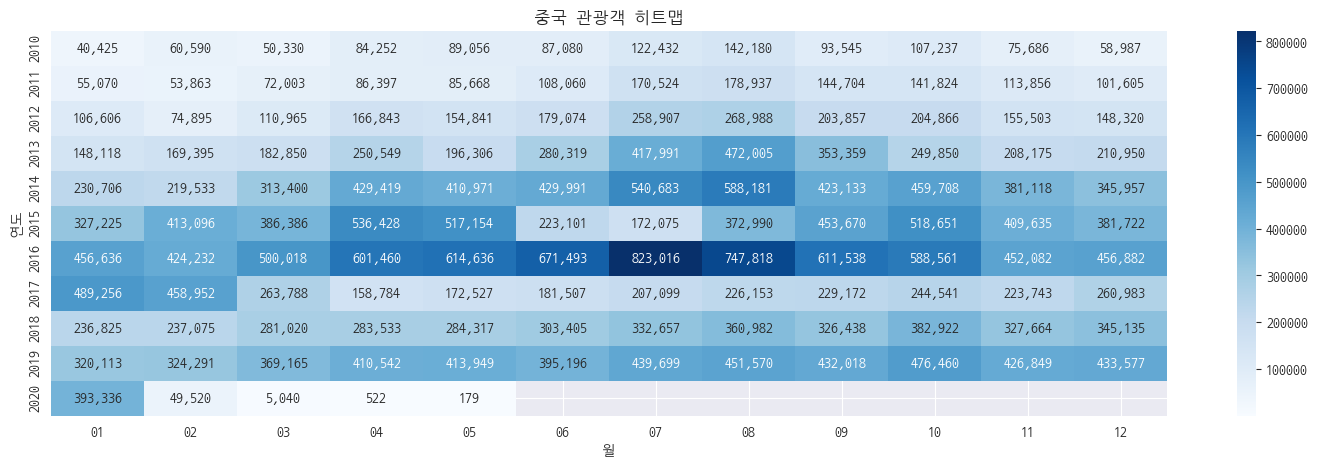

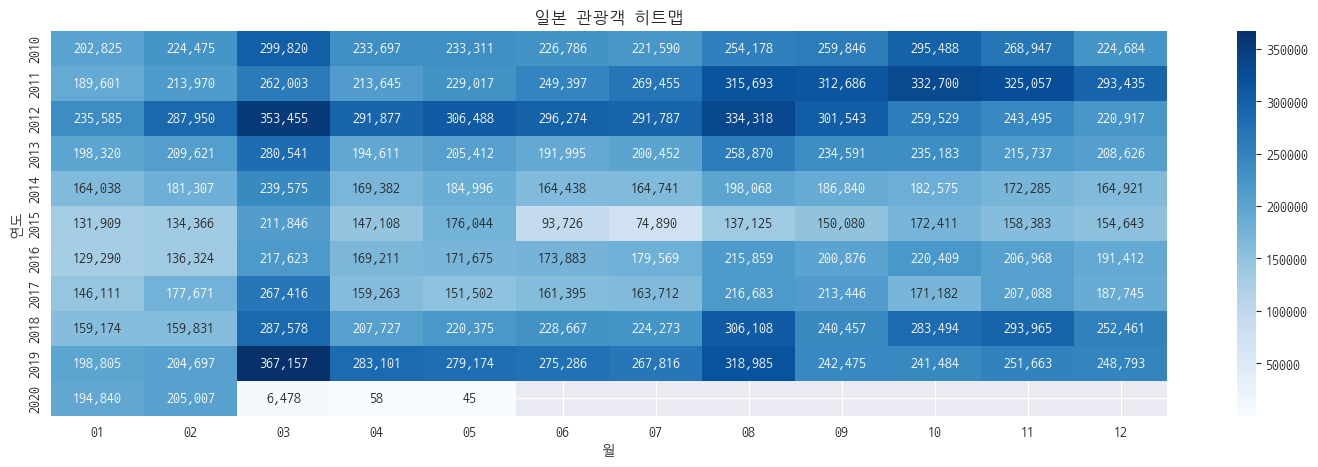

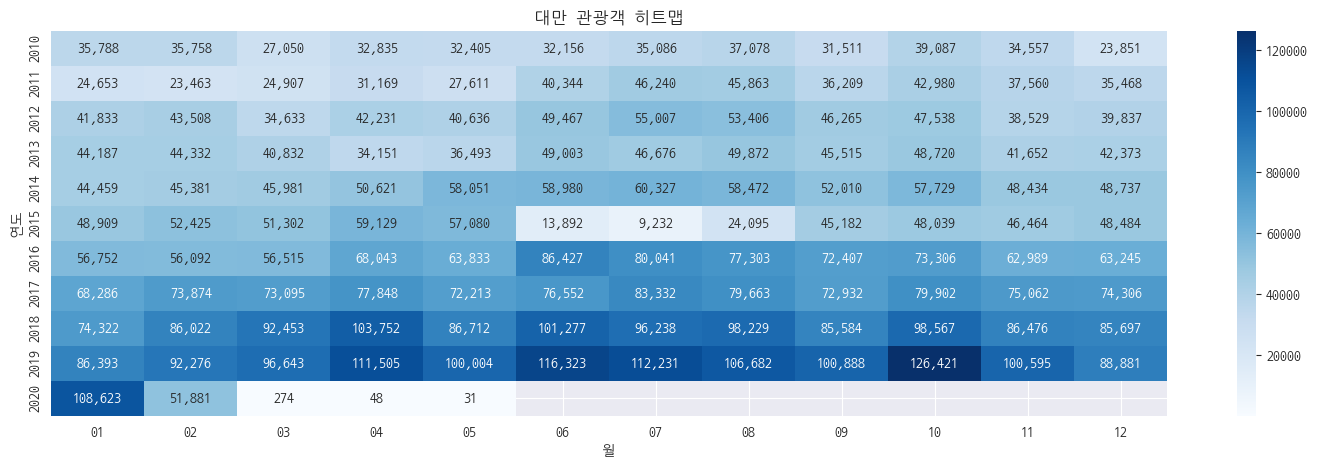

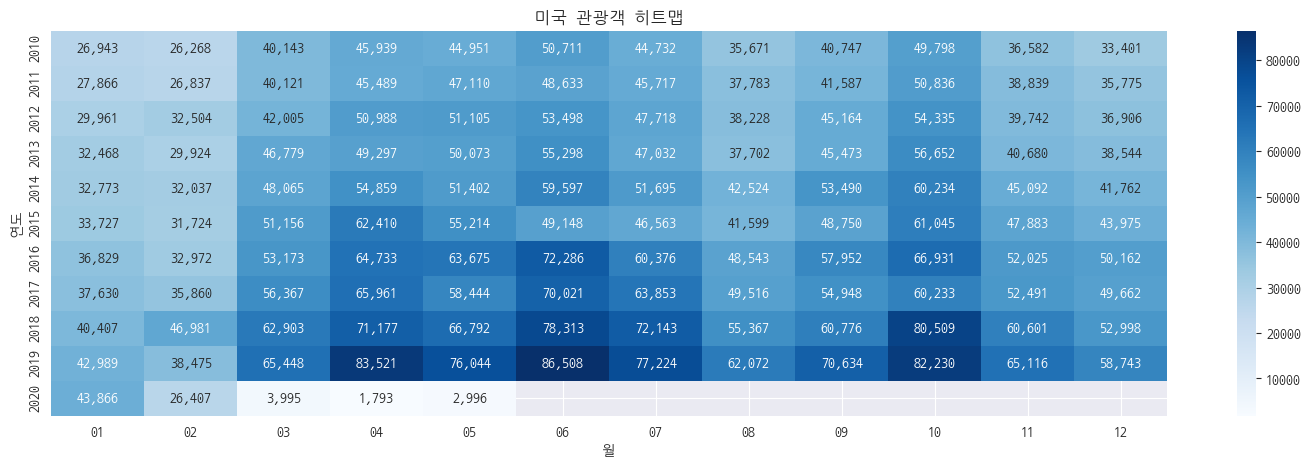

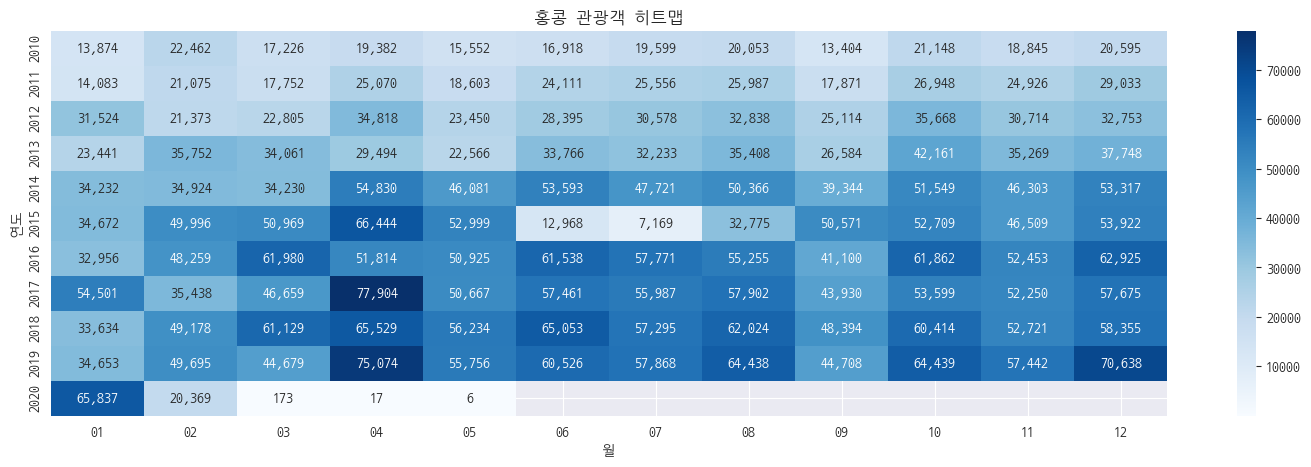

In [74]:
for contry in ['중국', '일본', '대만', '미국', '홍콩']:
    # 각 나라별로 관광객수 필터링
    condition = df_total['국적'] == contry
    df_filter = df_total[condition]
    
    plt.figure(figsize=(18, 5))
    
    df_pivot = df_filter.pivot_table(values='관광', index='연도', columns='월', aggfunc='sum')
    
    ax = sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Blues')
    plt.title(f'{contry} 관광객 히트맵')
    
    for t in ax.texts:
        t.set_text(f'{int(t.get_text()):,d}')
    
    plt.show()

##### 시각화 차트, 히트맵으로 분석

- 2010년 이후로 꾸준히 증가
- 2017년 초에 큰 폭으로 감소
- 여름에 관광객수가 피크
- 2015년 여름만 큰 폭으로 감소
- 2020년 초에 관광객수가 0에 수렴

##### 인터넷 검색 > 구글링
1. 2015년 여름 관광객수 감소 이유 검색('중국인 관광객), 도구 > 기간설정 날짜 지정
    - 메르스 발병으로 인한 관광객 감소, TOP5의 미국 외 모든 나라에서 동일하게 발생
2. 2017년 관광객수 감소
    - 사드(THAAD) 보복, 미국에서 사드를 한국에 배치하자 이에 대한 반발로 중국인 관광객 급감
3. 2020년 3월부터의 감소
    - 코로나 바이러스 창궐로 인한 감소, 모든나라 동일